##필요 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

##1. 데이터셋 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_set = pd.read_csv('drive/MyDrive/parking/data/train.csv')
test_set = pd.read_csv('drive/MyDrive/parking/data/test.csv')
age_gender_data = pd.read_csv('drive/MyDrive/parking/data/age_gender_info.csv')

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [5]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

In [6]:
train_set.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
    '임대보증금', '임대료', '지하철역개수', '버스정류장개수',
    '단지내주차면수', '등록차량수'
]

test_set.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
    '임대보증금', '임대료', '지하철역개수', '버스정류장개수',
    '단지내주차면수'
]

In [7]:
train_set.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역개수,버스정류장개수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


결측치 확인 *.isna() 및 처리

In [8]:
train_set.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       569
임대료         569
지하철역개수      211
버스정류장개수       4
단지내주차면수       0
등록차량수         0
dtype: int64

In [9]:
test_set.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          2
임대보증금       180
임대료         180
지하철역개수       42
버스정류장개수       0
단지내주차면수       0
dtype: int64

In [10]:
# 임대료 관련해서 너무 많이 na값이 있어 column 자체를 삭제했지만 필요할 수도 있다.

train_set = train_set.drop(['임대보증금', '임대료'], axis = 1)
test_set = test_set.drop(['임대보증금', '임대료'], axis = 1)

In [11]:
train_set = train_set.fillna(0)
test_set = test_set.fillna(0)

In [12]:
train_set.isna().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
자격유형        0
지하철역개수      0
버스정류장개수     0
단지내주차면수     0
등록차량수       0
dtype: int64

In [13]:
test_set.isna().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
자격유형        0
지하철역개수      0
버스정류장개수     0
단지내주차면수     0
dtype: int64

In [14]:
# test_set에는 서울특별시가 없다
print(train_set['지역'].unique(), test_set['지역'].unique(), sep='\n')

['경상북도' '경상남도' '대전광역시' '경기도' '전라북도' '강원도' '광주광역시' '충청남도' '부산광역시' '제주특별자치도'
 '울산광역시' '충청북도' '전라남도' '대구광역시' '서울특별시' '세종특별자치시']
['경기도' '부산광역시' '전라북도' '경상남도' '충청남도' '대전광역시' '제주특별자치도' '강원도' '울산광역시' '경상북도'
 '충청북도' '광주광역시' '전라남도' '대구광역시' '세종특별자치시']


In [15]:
print(train_set['임대건물구분'].unique(), test_set['임대건물구분'].unique())

['아파트' '상가'] ['아파트' '상가']


In [16]:
print(train_set['공급유형'].unique(), test_set['공급유형'].unique(), sep='\n')

['국민임대' '공공임대(50년)' '영구임대' '임대상가' '공공임대(10년)' '공공임대(분납)' '장기전세' '공공분양'
 '행복주택' '공공임대(5년)']
['국민임대' '영구임대' '임대상가' '공공임대(50년)' '공공임대(10년)' '공공임대(분납)' '행복주택']


##2. 데이터셋 카테고리 실수화

In [17]:
locations_map = {}
locations = train_set['지역'].unique()
#locations = np.sort(locations)

In [18]:
for value, key in enumerate(locations):
    locations_map[key] = value
locations_map

{'강원도': 5,
 '경기도': 3,
 '경상남도': 1,
 '경상북도': 0,
 '광주광역시': 6,
 '대구광역시': 13,
 '대전광역시': 2,
 '부산광역시': 8,
 '서울특별시': 14,
 '세종특별자치시': 15,
 '울산광역시': 10,
 '전라남도': 12,
 '전라북도': 4,
 '제주특별자치도': 9,
 '충청남도': 7,
 '충청북도': 11}

In [19]:
train_set['지역'] = train_set['지역'].map(locations_map)
test_set['지역'] = test_set['지역'].map(locations_map)

In [20]:
buildings_map = {}
buildings = train_set['임대건물구분'].unique()
#buildings = np.sort(buildings)

In [21]:
for value, key in enumerate(buildings):
    buildings_map[key] = value
buildings_map

{'상가': 1, '아파트': 0}

In [22]:
train_set['임대건물구분'] = train_set['임대건물구분'].map(buildings_map)
test_set['임대건물구분'] = test_set['임대건물구분'].map(buildings_map)

In [23]:
leases_map = {}
leases = train_set['공급유형'].unique()
#leases = np.sort(leases)

In [24]:
for value, key in enumerate(leases):
    leases_map[key] = value
leases_map

{'공공분양': 7,
 '공공임대(10년)': 4,
 '공공임대(50년)': 1,
 '공공임대(5년)': 9,
 '공공임대(분납)': 5,
 '국민임대': 0,
 '영구임대': 2,
 '임대상가': 3,
 '장기전세': 6,
 '행복주택': 8}

In [25]:
train_set['공급유형'] = train_set['공급유형'].map(leases_map)
test_set['공급유형'] = test_set['공급유형'].map(leases_map)

In [26]:
types_map = {}
types = train_set['자격유형'].unique()
#types = np.sort(types)

In [27]:
for value, key in enumerate(types):
    types_map[key] = value
types_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14}

In [28]:
train_set['자격유형'] = train_set['자격유형'].map(types_map)
test_set['자격유형'] = test_set['자격유형'].map(types_map)

In [29]:
train_set.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,지하철역개수,버스정류장개수,단지내주차면수,등록차량수
0,C2483,900,0,0,0,39.72,134,38.0,0,0.0,3.0,1425.0,1015.0
1,C2483,900,0,0,0,39.72,15,38.0,0,0.0,3.0,1425.0,1015.0
2,C2483,900,0,0,0,51.93,385,38.0,0,0.0,3.0,1425.0,1015.0
3,C2483,900,0,0,0,51.93,15,38.0,0,0.0,3.0,1425.0,1015.0
4,C2483,900,0,0,0,51.93,41,38.0,0,0.0,3.0,1425.0,1015.0


단지코드 중복 합치기

In [30]:
#단지 코드 중복 제거 개수
print("단지 코드 개수 ", len(train_set['단지코드']))
print("단지 코드 종류 개수 ", len(train_set['단지코드'].unique()))

단지 코드 개수  2952
단지 코드 종류 개수  423


In [31]:
columns = ['단지코드', '총세대수', '공가수', '전용면적', '임대건물구분', '지역', '공급유형', '지하철역개수', '버스정류장개수', '단지내주차면수'] #'임대보증금', '임대료',
target = '등록차량수'
area_column = '가중평균면적'

#area_columns = []
#for area in train_set['전용면적'].unique():
#    area_columns.append(f'면적_{area}')

In [32]:
new_train = pd.DataFrame()
new_test = pd.DataFrame()

In [33]:
for i, code in tqdm(enumerate(train_set['단지코드'].unique())):
    temp = train_set[train_set['단지코드']==code]
    temp['전용면적'] = (temp['전용면적'] * temp['전용면적별세대수']).sum() / temp['총세대수']
    temp.index = range(temp.shape[0])

    for col in columns:
        new_train.loc[i, col] = temp.loc[0, col]

    new_train.loc[i, '등록차량수'] = temp.loc[0, '등록차량수']

for i, code in tqdm(enumerate(test_set['단지코드'].unique())):
    temp = test_set[test_set['단지코드']==code]
    temp['전용면적'] = (temp['전용면적'] * temp['전용면적별세대수']).sum() / temp['총세대수']
    temp.index = range(temp.shape[0])

    for col in columns:
        new_test.loc[i, col] = temp.loc[0, col]

new_train = new_train.rename(columns={'전용면적': '가중평균면적'})
new_test = new_test.rename(columns={'전용면적': '가중평균면적'})

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
423it [00:03, 121.30it/s]
0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
150it [00:01, 136.09it/s]


##3. 데이터 분할: 트레이닝 데이터와 테스트 데이터

In [34]:
X_train = new_train.iloc[:, 1:-1]
y_train = new_train.iloc[:,-1]
X_test = new_test.iloc[:,1:]

In [35]:
#X_train = np.array(X_train, dtype=np.float64)
#y_train = np.array(y_train, dtype=np.float64)
#X_test = np.array(X_test, dtype=np.float64)

In [36]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()

In [37]:
y_train = y_train[:, np.newaxis]

In [38]:
X_train.shape

(423, 9)

In [39]:
y_train.shape

(423, 1)

##4. 입력 데이터 표준화

## 5. 모델 추정

In [40]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, LayerNormalization, Add, Input
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam

In [50]:
random_state=21
lr = 0.01
#desired_accuracy = 0.99
batch_size=32
epochs=5000

units=[1024, 512, 1024]
activations=['relu', 'relu', 'relu']
batchnorm_eps = 0.01
layernorm_eps = 1e-6
dropout_rate = 0.6
l2_rate = 0.6

In [42]:
#class myCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if logs.get('accuracy') is not None and logs.get('accuracy') > desired_accuracy:
#            print("\nReached 99% accuracy so cancelling training!")
#            self.model.stop_training = True
#callbacks = myCallback()

In [43]:
#model = tf.keras.models.Sequential([
#                                    Dense(1024, activation='relu'),
#                                    Dropout(dropout_rate),
#                                    Dense(512, activation='relu'),
#                                    Dropout(dropout_rate),
#                                    Dense(1024, activation='relu'),
#                                    Dropout(dropout_rate),
#                                    Dense(64, activation='relu'),
#                                    Dropout(dropout_rate),
#                                    Dense(8, activation='relu'),
#                                    Dropout(dropout_rate),
#                                    Dense(1, activation=None)])

In [44]:
class resBlock(tf.keras.layers.Layer):
    def __init__(self, units=units, activations=activations, batchnorm_eps=0.01, l2_rate=0.2):
        super(resBlock, self).__init__()

        self.FC1 = Dense(units[0], activation=activations[0], kernel_regularizer=L2(l2_rate))
        self.FC2 = Dense(units[1], activation=activations[1], kernel_regularizer=L2(l2_rate))
        self.FC3 = Dense(units[2], activation=activations[2], kernel_regularizer=L2(l2_rate))
        self.FC0 = Dense(units[-1], activation=activations[-1])

        self.batchnorm1 = BatchNormalization(axis=-1, epsilon=batchnorm_eps)
        self.batchnorm2 = BatchNormalization(axis=-1, epsilon=batchnorm_eps)
        self.batchnorm3 = BatchNormalization(axis=-1, epsilon=batchnorm_eps)

        self.relu1 = Activation('relu')
        self.relu2 = Activation('relu')
        self.relu3 = Activation('relu')
        self.relu0 = Activation('relu')

        self.Add = Add()
    
    def call(self, X):
        X_shortcut = X
        
        X = self.FC1(X)
        X = self.batchnorm1(X)
        X = self.relu1(X)
        
        X = self.FC2(X)
        X = self.batchnorm2(X)
        X = self.relu2(X)

        X = self.FC3(X)
        X = self.batchnorm3(X)
        X = self.relu3(X)
        
        X_shortcut = self.FC0(X_shortcut)
        
        X = self.Add([X, X_shortcut])
        X = self.relu0(X)
        
        return X

In [52]:
class myModel(tf.keras.Model):
    def __init__(self, units=units, activations=activations, batchnorm_eps=0.01, layernorm_eps=1e-6, dropout_rate=0.1, l2_rate=0.1):
        super(myModel, self).__init__()

        self.Res1 = resBlock(units=units, activations=activations, batchnorm_eps=batchnorm_eps, l2_rate=l2_rate)
        self.Res2 = resBlock(units=units, activations=activations, batchnorm_eps=batchnorm_eps, l2_rate=l2_rate)

        self.layernorm1 = LayerNormalization(epsilon=layernorm_eps)
        self.layernorm2 = LayerNormalization(epsilon=layernorm_eps)
        self.layernorm3 = LayerNormalization(epsilon=layernorm_eps)

        self.FC0 = Dense(units[-1], activation='relu')

        self.FC1 = Dense(1024, activation='relu', kernel_regularizer=L2(l2_rate))
        self.FC2 = Dense(64, activation='relu', kernel_regularizer=L2(l2_rate))
        self.FC3 = Dense(64, activation='relu', kernel_regularizer=L2(l2_rate))

        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)
        
        self.ffn = Dense(1, activation=None)

    def call(self, input):
        
        y1 = self.Res1(input)
        y0 = self.FC0(input)
        y1 = self.layernorm1(y1 + y0)
        
        y2 = self.Res2(y1)
        y2 = self.layernorm2(y2 + y1)

        y3 = self.FC1(y2)
        y3 = self.layernorm3(y3 + y2)

        y = self.FC2(y3)
        y = self.dropout1(y)
        y = self.FC3(y)
        y = self.dropout2(y)

        y_hat = self.ffn(y)
        return y_hat

In [53]:
model = myModel(units=units, activations=activations, batchnorm_eps=batchnorm_eps, layernorm_eps=layernorm_eps, dropout_rate=dropout_rate, l2_rate=l2_rate)

In [54]:
model.compile(loss='mean_absolute_error',
              optimizer=Adam(lr),
              metrics=['mae'])

In [55]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    steps_per_epoch=12,
                    epochs=epochs,
                    validation_split=0.1,
                    #validation_data=(X_val, y_val),
                    verbose=1)
                    #callbacks=[callbacks])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
12/12 [==============================] - 0s 25ms/step - loss: 125.5409 - mae: 110.9675 - val_loss: 130.9499 - val_mae: 116.5322
Epoch 2502/5000
12/12 [==============================] - 0s 26ms/step - loss: 128.3262 - mae: 113.9076 - val_loss: 121.6968 - val_mae: 107.3619
Epoch 2503/5000
12/12 [==============================] - 0s 30ms/step - loss: 136.8957 - mae: 123.5764 - val_loss: 129.3506 - val_mae: 115.6898
Epoch 2504/5000
12/12 [==============================] - 0s 29ms/step - loss: 139.9916 - mae: 125.1894 - val_loss: 127.6570 - val_mae: 111.6216
Epoch 2505/5000
12/12 [==============================] - 0s 26ms/step - loss: 139.5165 - mae: 123.2177 - val_loss: 136.8331 - val_mae: 119.5826
Epoch 2506/5000
12/12 [==============================] - 0s 27ms/step - loss: 136.2284 - mae: 119.1780 - val_loss: 138.0803 - val_mae: 121.5621
Epoch 2507/5000
12/12 [==============================] - 0s 27ms/step - loss: 137.2346 - mae: 121.4000 - val_loss: 1

##6. 결과 분석

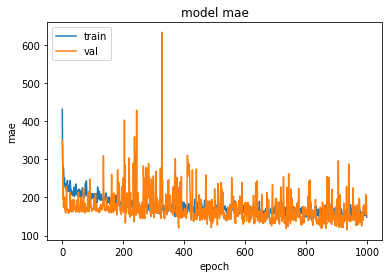

In [48]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [61]:
pred = model.predict(X_test)

In [62]:
submission = pd.read_csv('/content/drive/MyDrive/parking/data/sample_submission.csv')

In [63]:
submission['num'] = pred

In [64]:
submission.to_csv('/content/drive/MyDrive/parking/baseline.csv', index=False)